# Ready? Let's go! Visualization time! :)

### Let's start with the basics: our import statements! 

---

Make sure your import statements are working correctly and you run this cell first and foremost - else your other cells won't run correctly! 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

Now, let's import our data! You should be in the same directory that you worked in last class and have the Titanic data downloaded and ready to play with! 

Simply call it in as another *CSV-to-DataFrame dataset* and let's get moving! 

In [3]:
# Let's import our Titanic data! 

DATASET = "titanic.csv"  ## Make sure your Titanic data is at the same directory level as THIS notebook! 
titanic_df = pd.read_csv(DATASET)

Quick check to make sure everything looks good. It sure does! 

In [4]:
# titanic_df.head()
titanic_df.describe()
# titanic_df.describe(include="O")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Let's start with *bar charts*! 

---

**Bar charts**, otherwise known as bar graphs, bar plots, or histograms (you may have heard of those!) are very simple visualizations that allow you to plot categorical or quantitative data in a visually separable manner. 

Let's start by playing with the simpler of the two to visualize with bar charts: *categorical data*. 

We'll do this by answering the question: **How many passengers embarked from each boarding destination**?

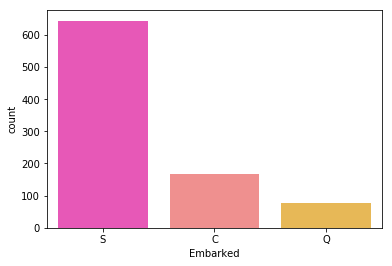

In [13]:
# Bar Chart Example #1 (Simple): Categorical Variables Showing Counts
sns.countplot(x="Embarked", palette="spring", data=titanic_df)

As you can see, the vast majority of passengers got on the *Titanic* in Southampton, followed by passengers embarking in Cherbourg and finally Queenstown passengers boarding in the least. 

Take note of the label on the Y-axis: *count*. This indicates that the y-variable measure is the *number of passengers for each criterion*. 

This is a very important detail to take note of as we move on to another application of bar charts: *quantitative (continuous) data*. 

We'll now ask the question: **What portion of men vs. women (across different classes) survived on the *Titanic*?**

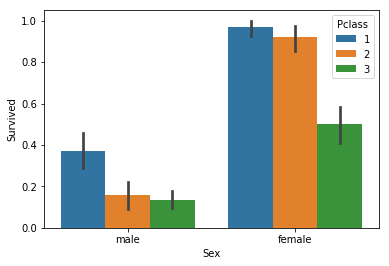

In [14]:
# Bar Chart Example #2 (Complex): Quantitative Variables Showing Frequency Estimates
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=titanic_df)

We can definitely see that women on the *Titanic* had a much better survival rate than men aboard, regardless of class. 

However, we can also see that the class division stayed approximately the same, with 1st-class passengers surviving at a much higher rate than 2nd- or 3rd-class passengers. Right? 

Right? 

Or is this **misleading** at all? 

While you contemplate that, recognize that the Y-axis label now states *Survived* and appears to bear the scale [0., 1.0]. 

That's because now we are displaying *frequency* information relative to the dataset as a whole. 

---

## Let's play around with scatter plots now! 

---

With scatter plots, we can see the *spread* and *distribution* of data much more clearly. 

These two concepts are **incredibly important** to the study of descriptive statistics and the foundations of data science. 

We'll dive much deeper into the concepts in later classes, but we may begin exploring them now. 

Let's start by creating a scatter plot to answer the following question: 

**What relationship is there between passenger age and how much a passenger paid for a ticket**?

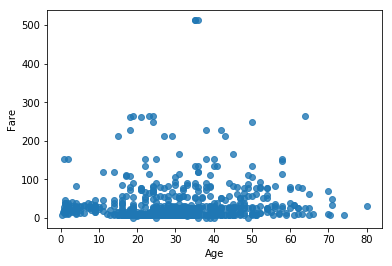

In [15]:
# Scatter Plot Example #1: Quantitative Continuous Variables Showing Multivariate Trends
sns.regplot(x="Age", y="Fare", fit_reg=False, data=titanic_df)

We can definitely see the *spread* of age-fare data, but is this necessarily clear to see any relationship? 

It seems that there appears to be the semblance of a relationship here, but let's clean up our visualization a little bit to see and possibly explore deeper trends. 

Perhaps, let's add an addendum to our question:

**What relationship is there between passenger age, number of passenger siblings/spouses, and how much a passenger paid for a ticket**?

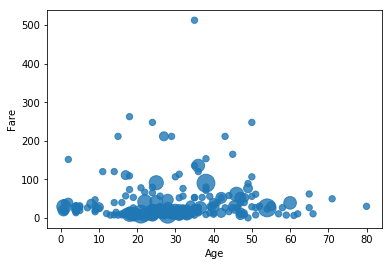

In [16]:
# Scatter Plot Example #1.1: Quantitative Continuous Variables Showing Multivariate Trends with Size Differentials
sns.regplot(x="Age", y="Fare", fit_reg=False, data=titanic_df, scatter_kws={"s": titanic_df["SibSp"]*40})

Hmm, still doesn't tell us too much about the relationship specifically.

Perhaps we looked in the wrong direction. Let's change that addendum:

**What relationship is there between passenger age, passenger class, and how much a passenger paid for a ticket**?

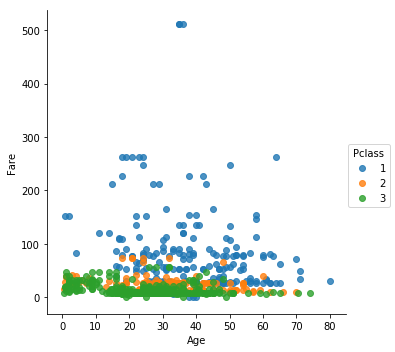

In [17]:
# Scatter Plot Example #1.2: Quantitative Continuous Variables Showing Multivariate Trends with Color Differentials
sns.lmplot(x="Age", y="Fare", fit_reg=False, data=titanic_df, hue="Pclass")

Okay, now we're getting somewhere! 

We can see a pretty clear division between classes across passengers, so perhaps there's a relationship there.

Let's hold onto that parameter than and continue to dive deeper, though before we do, let's clean up the visualization a little. 

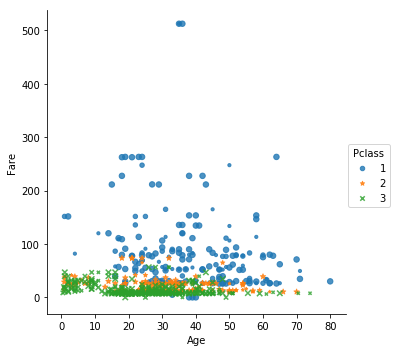

In [18]:
# Scatter Plot Example #1.3: Quantitative Continuous Variables Showing Multivariate Trends with Specialized Points
sns.lmplot(x="Age", y="Fare", fit_reg=False, data=titanic_df, hue="Pclass", 
           scatter_kws={"s": titanic_df["Pclass"]*10}, markers=["o", "*", "x"])

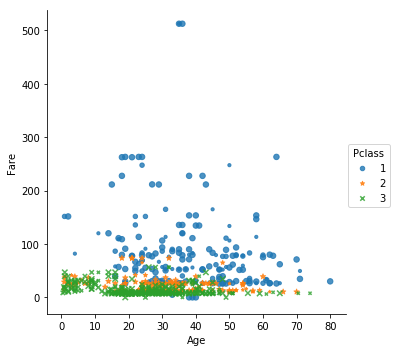

In [19]:
sns.lmplot(x="Age", y="Fare", fit_reg=False, data=titanic_df, hue="Pclass", 
           scatter_kws={"s": titanic_df["Pclass"]*10}, markers=["o", "*", "x"])

Hmm, while it does look cleaner, perhaps there's an easier way of splitting up our data for clarity's sake? 

Let's try another type of plot to do just that! 

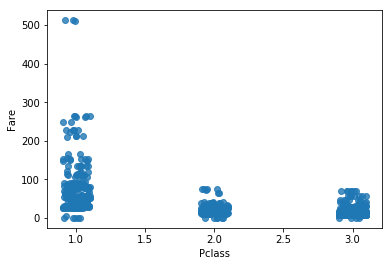

In [20]:
# Scatter Plot Example #2: Quantitative Discrete Variables Showing Multivariate Trends
sns.regplot(x="Pclass", y="Fare", fit_reg=False, x_jitter=.1, y_jitter=.5, data=titanic_df)

This looks *much* nicer, though we can still improve it. 

Instead of needlessly adding more and more keyword parameters to our visualization, let's use the power of Seaborn's extensive visualization library and use a visualization type similar to scatter plots...

---

## Introducing Strip Plots!

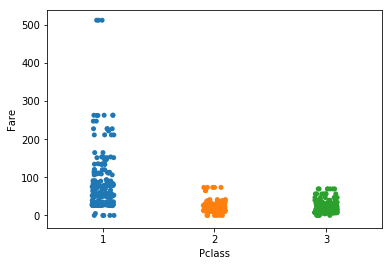

In [21]:
# Scatter Plot Example #3 (Strip Plot): Cleaner Reiteration of Example #2
sns.stripplot(x="Pclass", y="Fare", data=titanic_df, jitter=True)

*Strip plots* allow us to view quantitative data from a categorical lens. 

We can see the *spread* of fare data based on the categorical variable *Pclass*, indicating that the spread of 1st-class passengers is much higher than other classes in terms of fare. 

Let's explore another angle of this by adding *sex* into the mix. 

**Is there a relationship between passenger class and fare paid across male and female passengers**?

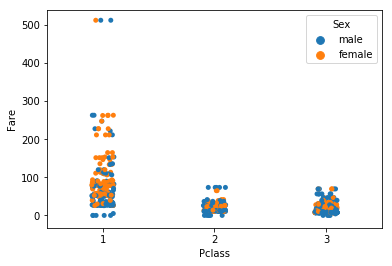

In [22]:
# Scatter Plot Example #3.1 (Strip Plot): Reiteration of Example #3 with Male-Female Separation Index
sns.stripplot(x="Pclass", y="Fare", data=titanic_df, jitter=True, hue="Sex")

Hm, that's a little hard to decipher. 

Our blue (male) and orange (female) data is a little too clustered together.

Let's fix that with a new type of visualization!

---

## Let's see the Swarm Plot! 

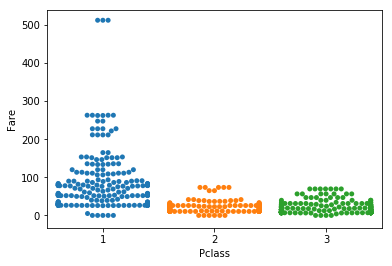

In [23]:
# Scatter Plot Example #4 (Swarm Plot): Cleaner Reiteration of Example #2 Showing Distribution Tendencies
sns.swarmplot(x="Pclass", y="Fare", data=titanic_df)

Ah! That's better. 

Oh, but we seemed to have lost our third parameter: sex. 
    
Let's add that back in there and clean up our display a little! 

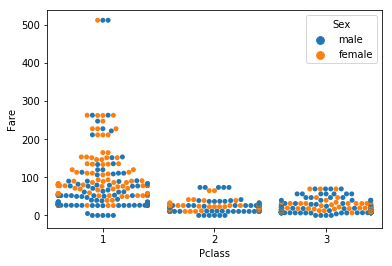

In [24]:
# Scatter Plot Example #4.1 (Swarm Plot): Reiteration of Example #4 with Male-Female Separation Index
sns.swarmplot(x="Pclass", y="Fare", data=titanic_df, hue="Sex")

We're nearly there! 

The last thing we can do with Swarm Plots is divide up some of the categorical variables that we're already attempting to separate on by color. 

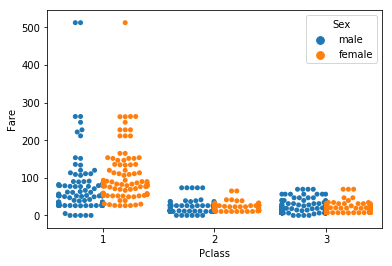

In [56]:
# Scatter Plot Example #4.2 (Swarm Plot): Reiteration of Example #4 with Male-Female Separation Index 
#                                         and Active Subsplit
sns.swarmplot(x="Pclass", y="Fare", data=titanic_df, hue="Sex", dodge=True)

## Activity time! 

---

Think of **3-5 questions** to answer that require or are assisted by the use of descriptive visualizations to answer. 

Remember to keep in mind the difference between data types and structures while approaching visualizations. 

They matter! Most of the time, a visualization may crash simply because of the type and structure of data sent to it. 

---

# Today's Material: Incorporating Descriptive Statistics in Advanced Visualizations

Today, we'll be focusing on the intersection of:
- #### what descriptive statistics can tell you about the *spread* and *distribution* of data
- #### how data visualization can convey information surrounding a dataset.

## Critical Questions

- How can the clustering/scattering of data (its *spread*) affect how one looks at the data?
- How can data visualizations reflect the spread and distribution of data? 

---

# <center>Let's see Donovan's notebook!</center>

---

## What is the Mean? 

### IN-CLASS ASSIGNMENT

Generate a function that takes an input of a list/array of integers and outputs the mean (average) of the list. 

## What is the Median? 

### IN-CLASS ASSIGNMENT

Generate a function that takes an input of a list/array of integers and outputs the median (middle value) of the list.

## What is the Mode? 

**Mode** is the **M**ost **O**ccurring **D**ata **E**lement. 

### OUT-OF-CLASS STRETCH CHALLENGE (optional)

Generate a function that takes an input of a list/array of integers and outputs the mode (most common value) of the list. 

---

## Some Advanced Visualizations with More Descriptive Statistics

### Introducing the Violin Plot! Look familiar? 

It should! 

This should look starkly familiar to the **swarm plot**. 

The advantage of the violin plot is it sacrifices showing the exact scatter of data to instead focus on the data's *spread* and *distribution*. 

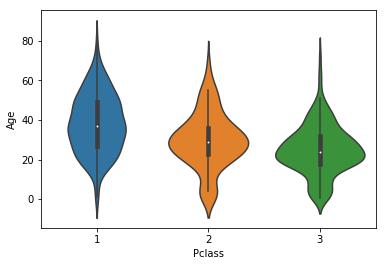

In [38]:
sns.violinplot(x="Pclass", y="Age", data=titanic_df)
# sns.violinplot(x="Pclass", y="Age", data=titanic_df, inner=None)

Let's take another look at the swarm plot to see how it differs.

### Swarm Plot! 

The swarm plot now makes the opposing sacrifice, now choosing to show the scatter and a more exact measure of how much data we're dealing with. 

However, now it's less clear about how the data is distributed. 

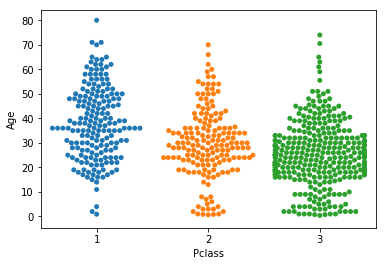

In [29]:
sns.swarmplot(x="Pclass", y="Age", data=titanic_df)

Now, you may be wondering: 
    
*Kash! Why do I need to choose?*
    
Good question! You don't. 

Let's integrate MatPlotLib a little bit to work on your first ever **data visualization overlay**. 

### Let's see the overlayed Violin-Swarm Plot! 

Now, we don't have to choose!

Text(0.5,1,'Spread of Titanic Passengers by Age, Separated by Class')

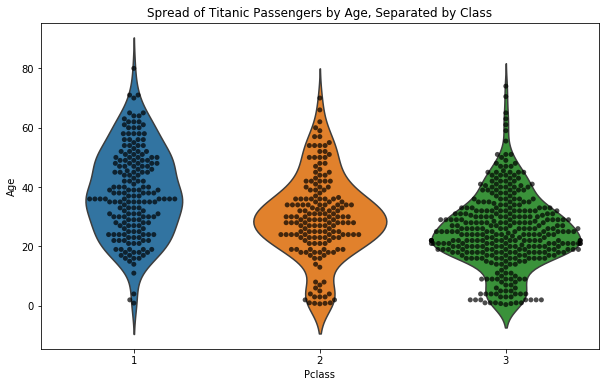

In [33]:
plt.figure(figsize=(10,6))
sns.violinplot(x="Pclass", y="Age", data=titanic_df, inner=None)
sns.swarmplot(x="Pclass", y="Age", data=titanic_df, color="k", alpha=0.7) 
plt.title("Spread of Titanic Passengers by Age, Separated by Class")

Seaborn can even show a dynamically constructed *Swarm Plot* by passing the argument `swarm` as a parameter to our new visualization: a **Factor Plot!**

### Show me the Factor Plot! 

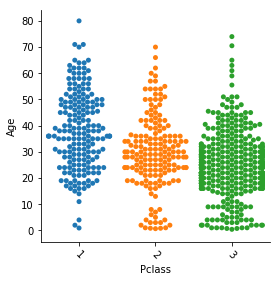

In [40]:
viz = sns.factorplot(x="Pclass", y="Age", data=titanic_df, kind="swarm")
viz.set_xticklabels(rotation=-45)

Exciting, huh?

These are just *a few* of the many, *many*, **MANY** different kinds of visualizations that Seaborn has to offer. 

I encourage you as you move forward in this class to make use of different visualizations (both ones we've learned and ones that elude your understanding... for now!) to answer basic, intermediate, and advanced descriptive data questions. 

---

<center>After all...</center>

### <center>Who knows what you can learn from data after *drawing a picture*?</center>

## TODO: 

Use your new knowledge of descriptive statistics to generate 3-5 questions you can answer using your newfound powers of _data visualization_! 

- *GOOD*: How many passengers aboard the Titanic were female and between the ages of 20-30? 
- *BAD*: What's the likelihood that a male passenger who survived is over the age of 60? 